#Clustering
###Nama  : Michael gerald dwiputra
###Nim   : 231061004
### Prodi : Sains data

`import pandas as pd`
Fungsi: Digunakan untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame)
Contoh: Membaca file CSV, memfilter kolom atau baris, dan mengolah data untuk analisis

`from sklearn.cluster import KMeans`
Fungsi: Mengimpor algoritma K-Means dari library Scikit-learn untuk melakukan clustering pada data.
Contoh: Membagi data ke dalam sejumlah klaster berdasarkan kesamaan antar data

`from sklearn.preprocessing import StandardScaler`
Fungsi: Digunakan untuk menstandarisasi data dengan mengubahnya ke skala dengan mean = 0 dan standar deviasi = 1.
Kegunaan: Memastikan semua fitur memiliki skala yang sama sehingga K-Means dapat bekerja secara optimal

`import matplotlib.pyplot as plt`
Fungsi: Library untuk membuat grafik atau visualisasi data.
Contoh: Membuat grafik seperti scatter plot, garis, atau histogram untuk menganalisis hasil clustering.

`import seaborn as sns`
Fungsi: Library visualisasi data berbasis Matplotlib yang menyediakan antarmuka tingkat tinggi untuk membuat plot yang estetis.
Contoh: Membuat scatter plot berwarna untuk memvisualisasikan hasil clustering.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

`data = pd.read_csv`
Digunakan untuk mengimport dan membaca data set csv

In [ ]:
data = pd.read_csv('/content/students.csv')

`features = ['Age', 'GraduationYear']`
Fungsi: Variabel ini menyimpan daftar nama kolom (features) dari dataset yang akan digunakan untuk clustering. Dalam hal ini, fitur yang dipilih adalah:
Age: Usia dari individu dalam dataset.
GraduationYear: Tahun kelulusan dari individu dalam dataset.
Tujuan: Menentukan subset dari dataset yang relevan untuk analisis clustering.

`data_features = data[features]`
Fungsi: Memfilter dataset asli (data) untuk hanya menyertakan kolom yang ada dalam variabel features.
Hasil: DataFrame baru (data_features) yang hanya memiliki dua kolom, yaitu Age dan GraduationYear.
Tujuan: Fokus pada fitur-fitur yang dipilih untuk digunakan dalam proses clustering

In [ ]:
features = ['Age', 'GraduationYear']
data_features = data[features]

`scaler = StandardScaler()`
Fungsi: Membuat objek StandardScaler dari Scikit-learn.
Tujuan: StandardScaler digunakan untuk menstandarisasi data sehingga setiap fitur memiliki:
Mean = 0
Standar deviasi = 1
Alasan Standarisasi: Dalam algoritma seperti K-Means, fitur yang memiliki skala lebih besar dapat mendominasi perhitungan jarak. Standarisasi memastikan semua fitur memiliki kontribusi yang setara.

`data_scaled = scaler.fit_transform(data_features)`
Fungsi:
fit: Menghitung statistik (mean dan standar deviasi) dari data data_features.
transform: Menggunakan statistik tersebut untuk menstandarisasi data

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

Digunakan untuk Membuat plot 𝑘
k vs. inertia.

Menentukan jumlah klaster optimal berdasarkan "titik siku" (elbow point) di grafik

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


Digunakan menentukan jumlah klaster optimal menggunakan metode elbow. "Titik siku" (elbow point) adalah lokasi di mana nilai inertia mulai berkurang dengan lambat. Titik ini menunjukkan jumlah klaster yang optimal

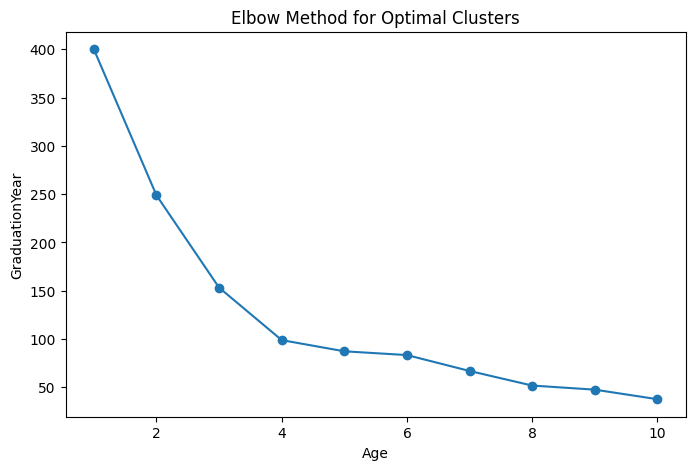

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Age')
plt.ylabel('GraduationYear')
plt.show()

`kmeans = KMeans(n_clusters=3, random_state=42):`
KMeans: Ini adalah algoritma clustering yang digunakan untuk membagi data ke dalam beberapa kelompok (clusters).
n_clusters=3: Menentukan jumlah kelompok yang diinginkan, dalam hal ini adalah 3 kelompok.
random_state=42: Memberikan seed untuk memastikan hasil dari algoritma K-Means konsisten setiap kali dijalankan (karena algoritma melibatkan inisialisasi acak).

`clusters = kmeans.fit_predict(data_scaled):`
fit_predict: Kombinasi dari dua langkah:
fit: Mencari pusat cluster (centroids) berdasarkan data yang diberikan.
predict: Menentukan kelompok (cluster) mana yang dimiliki oleh setiap data dalam dataset.
data_scaled: Ini adalah data yang sudah di-scale (misalnya dengan StandardScaler atau MinMaxScaler), karena K-Means sensitif terhadap skala data. Data dalam bentuk yang distandarisasi membantu algoritma memberikan hasil yang lebih akurat.
clusters: Variabel ini akan menyimpan hasil berupa array, di mana setiap elemen menunjukkan indeks kelompok (0, 1, atau 2) dari setiap data dalam dataset.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

`data['Cluster']` = clusters digunakan untuk menambahkan hasil clustering ke dalam dataset sebagai kolom baru bernama 'Cluster

Setiap baris data akan diberi label kelompok (cluster) sesuai dengan hasil K-Means

In [ ]:
data['Cluster'] = clusters

`centroids = scaler.inverse_transform(kmeans.cluster_centers_)` digunakan untuk mengembalikan posisi pusat cluster (centroids) ke skala asli data sebelum normalisasi

In [ ]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

`plt.figure(figsize=(8, 6)):`
Membuat ukuran kanvas untuk plot sebesar 8x6

`sns.scatterplot:`
Membuat scatter plot untuk data

`plt.scatter:`
Menambahkan titik untuk centroids (pusat cluster):

`plt.title, plt.xlabel, dan plt.ylabel:`
Menambahkan judul dan label pada sumbu X dan Y.

`plt.legend(title='Cluster'):`
Menambahkan legenda dengan judul "Cluster".

`plt.show():`
Menampilkan plot.

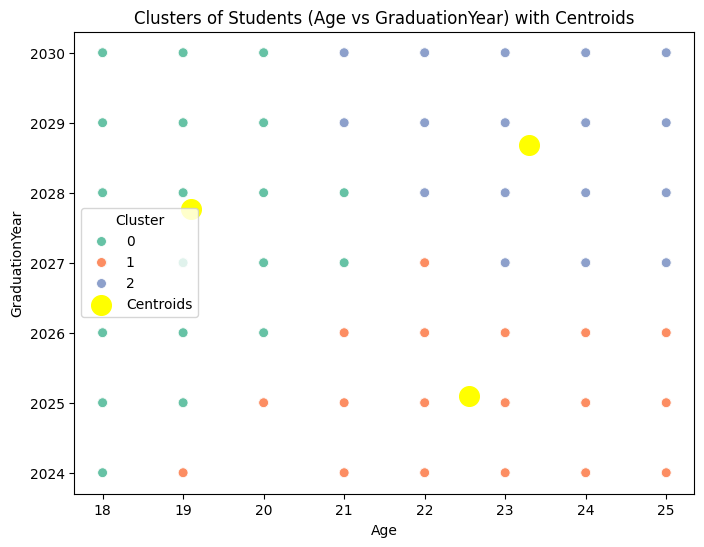

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['GraduationYear'], hue=data['Cluster'], palette='Set2', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', marker='o', s=200, label='Centroids')
plt.title('Clusters of Students (Age vs GraduationYear) with Centroids')
plt.xlabel('Age')
plt.ylabel('GraduationYear')
plt.legend(title='Cluster')
plt.show()

satu cluster tertentu, memvisualisasikan datanya, dan menonjolkan pusat cluster (centroid). Hal ini berguna untuk menganalisis secara lebih detail pola dalam cluster yang dipilih.

`selected_cluster = 0:`
Menentukan cluster yang ingin divisualisasikan. Di sini, cluster yang dipilih adalah cluster ke-0.

`cluster_data = data[data['Cluster'] == selected_cluster]:`
Menyaring data hanya untuk baris yang termasuk dalam cluster ke-0.

`unique_palette:`
Membuat palet warna unik untuk cluster yang dipilih

`sns.color_palette:`
 Mengambil palet warna yang sesuai dengan jumlah total cluster

`selected_cluster:`
 Memilih warna hanya untuk cluster yang dipilih

`sns.scatterplot:`
Membuat scatter plot untuk data pada cluster tertentu:
x=cluster_data['Age']: Sumbu X adalah umur
y=cluster_data['GraduationYear']: Sumbu Y adalah tahun kelulusan.
hue=cluster_data['Cluster']: Warna ditentukan oleh label cluster (hanya satu cluster dalam hal ini)

`palette=unique_palette:` Palet warna hanya untuk cluster yang dipilih.
s=50: Ukuran titik adalah 50

`selected_centroid = centroids[selected_cluster]:`
Mendapatkan koordinat pusat cluster untuk cluster yang dipilih.

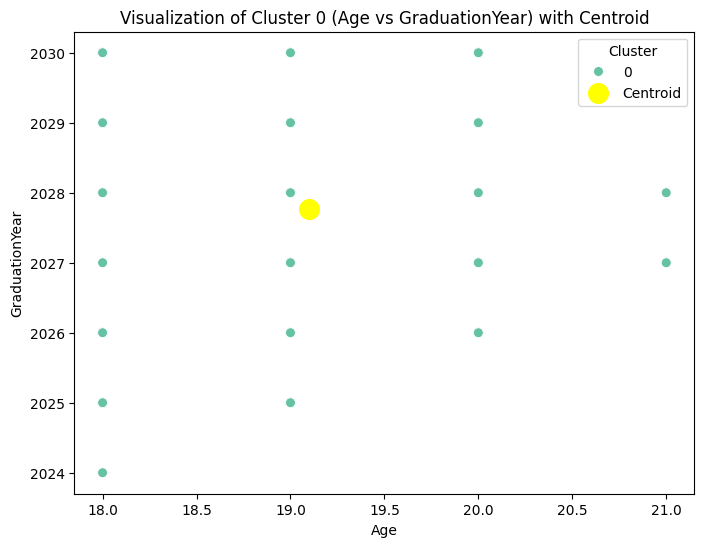

In [ ]:
selected_cluster = 0
cluster_data = data[data['Cluster'] == selected_cluster]
unique_palette = {selected_cluster: sns.color_palette('Set2', n_colors=data['Cluster'].nunique())[selected_cluster]}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=cluster_data['Age'],
    y=cluster_data['GraduationYear'],
    hue=cluster_data['Cluster'],
    palette=unique_palette,
    s=50
)

selected_centroid = centroids[selected_cluster]
plt.scatter(selected_centroid[0], selected_centroid[1], c='yellow', marker='o', s=200, label='Centroid')

plt.title(f'Visualization of Cluster {selected_cluster} (Age vs GraduationYear) with Centroid')
plt.xlabel('Age')
plt.ylabel('GraduationYear')
plt.legend(title='Cluster')
plt.show()

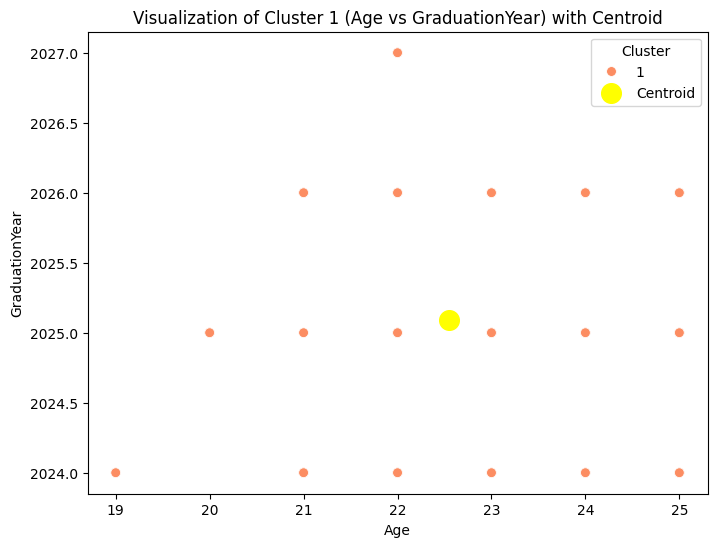

In [ ]:
selected_cluster = 1
cluster_data = data[data['Cluster'] == selected_cluster]
unique_palette = {selected_cluster: sns.color_palette('Set2', n_colors=data['Cluster'].nunique())[selected_cluster]}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=cluster_data['Age'],
    y=cluster_data['GraduationYear'],
    hue=cluster_data['Cluster'],
    palette=unique_palette,
    s=50
)

selected_centroid = centroids[selected_cluster]
plt.scatter(selected_centroid[0], selected_centroid[1], c='yellow', marker='o', s=200, label='Centroid')

plt.title(f'Visualization of Cluster {selected_cluster} (Age vs GraduationYear) with Centroid')
plt.xlabel('Age')
plt.ylabel('GraduationYear')
plt.legend(title='Cluster')
plt.show()

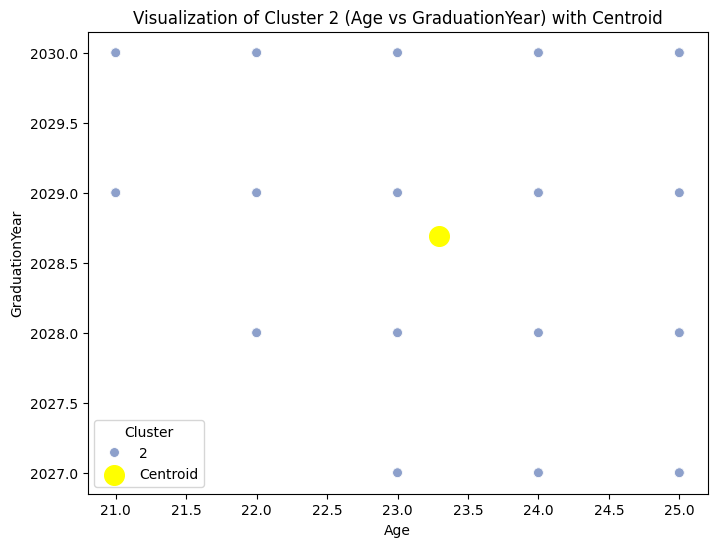

In [ ]:
selected_cluster = 2
cluster_data = data[data['Cluster'] == selected_cluster]
unique_palette = {selected_cluster: sns.color_palette('Set2', n_colors=data['Cluster'].nunique())[selected_cluster]}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=cluster_data['Age'],
    y=cluster_data['GraduationYear'],
    hue=cluster_data['Cluster'],
    palette=unique_palette,
    s=50
)

selected_centroid = centroids[selected_cluster]
plt.scatter(selected_centroid[0], selected_centroid[1], c='yellow', marker='o', s=200, label='Centroid')

plt.title(f'Visualization of Cluster {selected_cluster} (Age vs GraduationYear) with Centroid')
plt.xlabel('Age')
plt.ylabel('GraduationYear')
plt.legend(title='Cluster')
plt.show()